In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
#
from dhnnlib import *
#
#
if not exists(ISPARENT):
    %cd -q ../
! echo "current working dir:" $(pwd)
#
#
def show_graph_with_labels(adjacency_matrix, mylabels):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=500, labels=mylabels, with_labels=True)
    plt.show()

current working dir: /home/opisthofulax/PhD/projects/lrgwn


In [53]:
N = 512
K = 12
T = 2
a = np.fromfile(f"res/data/jmat2/MARKOV_N=512/T=0.5_K={K:d}_6.bin", dtype=np.int32)
mt1 = np.zeros((N, N))
count = 0
for i in range(N):
    for j in range(i):
        mt1[i][j] = a[count]
        mt1[j][i] = a[count]
        count += 1
mt1.max(), np.mean(mt1), np.std(mt1)

(12.0, 0.69281005859375, 4.333860095143107)

In [54]:
def func(a):
    return βcH2(a)-1/T
alpha2 = fsolve(func, x0=0.14)[0]

In [55]:
0.141/alpha2, -1/np.log(np.tanh(1/T))

(1.4980262670430653, 1.295442784141215)

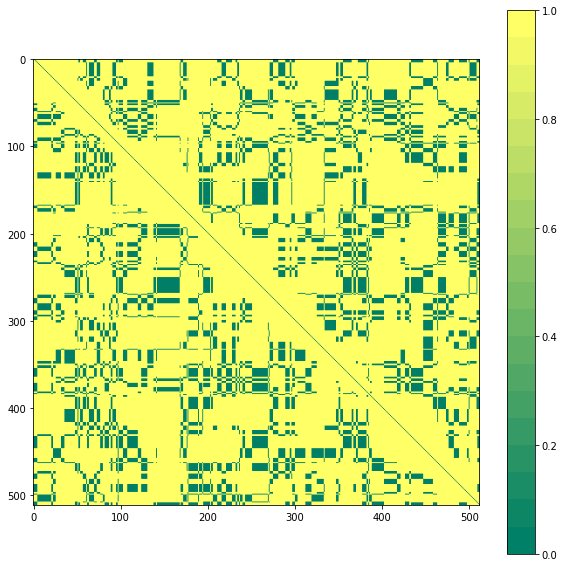

In [33]:
b =(np.abs(mt1) > 0.7)
plt.figure(figsize=(10, 10))
cmap = cm.get_cmap('summer', 20)
plt.imshow(b, cmap=cmap) 
plt.colorbar()
plt.show()

(array([ 1496.,  5380., 15646., 29582., 42798., 94030., 33292., 18262.,
        10564., 11094.]),
 array([-12. ,  -9.6,  -7.2,  -4.8,  -2.4,   0. ,   2.4,   4.8,   7.2,
          9.6,  12. ]),
 <BarContainer object of 10 artists>)

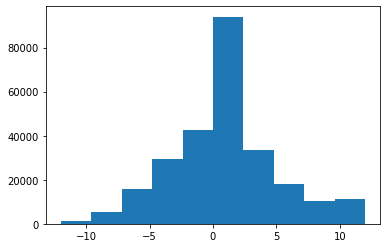

In [30]:
plt.hist(mt1.flatten(), bins=10)


(0.69281005859375, 4.333860095143107)